<a href="https://colab.research.google.com/github/yweslakarep123/tumor_classfication/blob/main/Tumor_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!chmod 600 /content/kaggle.json

In [5]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 204MB/s]


In [6]:
!pip install patool pyunpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 3.0 MB/s eta 0:00:00


In [7]:
from pyunpack import Archive
zip_file_path = '/content/brain-mri-images-for-brain-tumor-detection.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [7]:
img_data = []
paths_data = []
hasil = []

for root, dir, files in os.walk(r'/content/drive/MyDrive/Test_dataset/brain_tumor_dataset/yes'):
  for f in files:
    if '.jpg' in f:
      paths_data.append(os.path.join(root,f))

for path in paths_data:
  img = Image.open(path)
  img = img.resize((128,128))
  img = np.array(img)
  if img.shape == (128,128,3):
    img_data.append(np.array(img))
    hasil.append(encoder.transform([[0]]).toarray())


In [8]:
paths_data = []

for root, dir, files in os.walk(r'/content/drive/MyDrive/Test_dataset/brain_tumor_dataset/no'):
  for f in files:
    if '.jpg' in f:
      paths_data.append(os.path.join(root,f))

for path in paths_data:
  img = Image.open(path)
  img = img.resize((128,128))
  img = np.array(img)
  if img.shape == (128,128,3):
    img_data.append(np.array(img))
    hasil.append(encoder.transform([[1]]).toarray())

In [9]:
img_data = np.array(img_data)
img_data.shape

(139, 128, 128, 3)

In [10]:
hasil = np.array(hasil)
hasil = hasil.reshape(139,2)
hasil.shape

(139, 2)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(img_data,hasil,test_size=0.2,shuffle=True,random_state=0)

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(2,2), input_shape=(128,128,3),padding='same'))
model.add(Conv2D(32,kernel_size=(2,2), activation='relu',padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,kernel_size=(2,2), activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(2,2), activation='relu',padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [13]:
history = model.fit(x_train,y_train,epochs=30,batch_size=32,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
4/4 [==============================] - 11s 589ms/step - loss: 8.3949 - val_loss: 34.3829
Epoch 2/30
4/4 [==============================] - 0s 54ms/step - loss: 6.0235 - val_loss: 2.4466
Epoch 3/30
4/4 [==============================] - 0s 53ms/step - loss: 5.5014 - val_loss: 3.8490
Epoch 4/30
4/4 [==============================] - 0s 52ms/step - loss: 2.9570 - val_loss: 10.9809
Epoch 5/30
4/4 [==============================] - 0s 51ms/step - loss: 1.4944 - val_loss: 6.5552
Epoch 6/30
4/4 [==============================] - 0s 52ms/step - loss: 0.7509 - val_loss: 1.2385
Epoch 7/30
4/4 [==============================] - 0s 54ms/step - loss: 0.3332 - val_loss: 0.9164
Epoch 8/30
4/4 [==============================] - 0s 51ms/step - loss: 0.4239 - val_loss: 1.7265
Epoch 9/30
4/4 [==============================] - 0s 55ms/step - loss: 0.1802 - val_loss: 3.1972
Epoch 10/30
4/4 [==============================] - 0s 54ms/step - loss: 0.3006 - val_loss: 3.4150
Epoch 11/30
4/4 [========

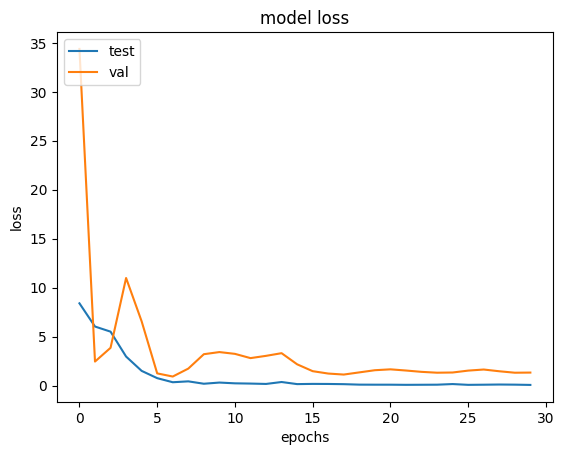

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['test','val'], loc='upper left')
plt.show()

In [19]:
def out(val):
  if val ==0:
    return 'bukan tumor'
  else:
    return 'tumor'

6.490124e-05% confidence kalau ini adalah bukan tumor


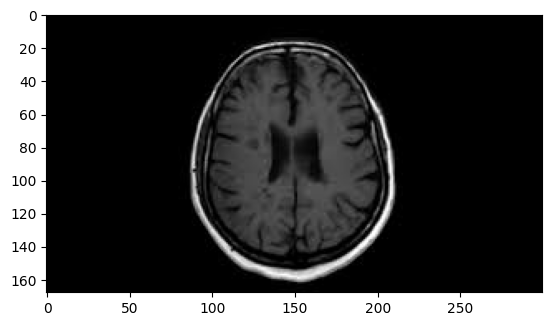

In [20]:
img = Image.open(r'/content/drive/MyDrive/Test_dataset/brain_tumor_dataset/no/11 no.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)

result = model.predict_on_batch(x)
classification = np.where(hasil == np.amax(hasil))[1][0]
plt.imshow(img)
print(str(result[0][classification*100]) + '% confidence kalau ini adalah '+ out(classification))

In [22]:
folder_path = '/content/drive/MyDrive/test_model'
filename = folder_path+'tumor_klasifikasi_model.h5'

model.save(filepath=filename)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
